<a href="https://colab.research.google.com/github/AI-Samoyed/COVID-Machine-Learning-/blob/master/COVID_Master_Corrplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Packages to install

!pip install geojson
!pip install geopandas

import requests
import folium
import geojson
import geopandas as gpd
import urllib.request
import json
import branca.colormap as cm
from folium.plugins import TimeSliderChoropleth

# General Tools
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# regression functions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# DATA:
# from "https://resources-covid19canada.hub.arcgis.com/datasets/PHAC-ASPC::covid19-data"
with urllib.request.urlopen("https://opendata.arcgis.com/datasets/a38f44f1a9c14fe1b8352933c71731de_0.geojson") as url:
    data = json.loads(url.read().decode())

# polygon files for the map
map_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/canada.geojson"
with urllib.request.urlopen(map_url) as url:
    map_data = gpd.read_file(url)

map_data['name'] = map_data['name'].str.replace('Yukon Territory', 'Yukon')

feature_data = pd.read_csv('https://raw.githubusercontent.com/AI-Samoyed/COVID-Machine-Learning-/master/feature2')

     |████████████████████████████████| 972kB 5.1MB/s 
     |████████████████████████████████| 14.8MB 324kB/s 
     |████████████████████████████████| 6.5MB 39.3MB/s 


In [13]:
raw = pd.DataFrame.from_dict(data["features"])
raw = pd.DataFrame.from_records(raw["properties"])
raw_now = raw[raw['Date'] >= '2020/11/25']
#feature_data = feature_data.rename(columns={'name': 'Name'})
feature_data          

,Name,Pop,Land_Area,Pop_Den,Avg_Age_Both,Avg_Age_M,Avg_Age_F,Avg_HS,Total_#_Income_Earner,Med_Income,Avg_CD
0,CANADA,35151728,8965588.85,3.9,41.0,40.1,41.9,2.4,27488525,34204,26.2
1,Newfoundland and Labrador,519716,370514.08,1.4,43.7,42.9,44.4,2.3,422335,31754,20.5
2,Prince Edward Island,142907,5686.03,25.1,42.7,41.7,43.6,2.3,113480,31744,18.0
3,Nova Scotia,923598,52942.27,17.4,43.5,42.5,44.4,2.3,744260,31813,22.2
4,New Brunswick,747101,71388.81,10.5,43.6,42.7,44.5,2.3,594710,30961,18.9
5,Quebec,8164361,1356625.27,6.0,41.9,40.9,42.9,2.3,6417615,32975,25.8
6,Ontario,13448494,908699.33,14.8,41.0,40.0,41.9,2.6,10556935,33539,28.8
7,Manitoba,1278365,552370.99,2.3,39.2,38.2,40.2,2.5,954040,34188,22.4
8,Saskatchewan,1098352,588243.54,1.9,39.1,38.2,40.0,2.5,822620,38299,18.8
9,Alberta,4067175,640330.46,6.4,37.8,37.2,38.4,2.6,3053470,42717,25.0


In [7]:
prov_df = raw_now[["Name", "Confirmed_Cases"]]

prov_df

,Name,Confirmed_Cases
3942,Nunavut,155
3943,Northwest Territories,15
3944,Yukon,39
3945,Prince Edward Island,70
3946,Nova Scotia,1243
3947,New Brunswick,453
3948,Manitoba,14907
3949,Quebec,135430
3950,Ontario,107883
3951,Saskatchewan,7047


In [14]:
new_prov = feature_data.merge(prov_df, left_on='Name', right_on='Name')
new_prov 

,Name,Pop,Land_Area,Pop_Den,Avg_Age_Both,Avg_Age_M,Avg_Age_F,Avg_HS,Total_#_Income_Earner,Med_Income,Avg_CD,Confirmed_Cases
0,Newfoundland and Labrador,519716,370514.08,1.4,43.7,42.9,44.4,2.3,422335,31754,20.5,324
1,Prince Edward Island,142907,5686.03,25.1,42.7,41.7,43.6,2.3,113480,31744,18.0,70
2,Nova Scotia,923598,52942.27,17.4,43.5,42.5,44.4,2.3,744260,31813,22.2,1243
3,New Brunswick,747101,71388.81,10.5,43.6,42.7,44.5,2.3,594710,30961,18.9,453
4,Quebec,8164361,1356625.27,6.0,41.9,40.9,42.9,2.3,6417615,32975,25.8,135430
5,Ontario,13448494,908699.33,14.8,41.0,40.0,41.9,2.6,10556935,33539,28.8,107883
6,Manitoba,1278365,552370.99,2.3,39.2,38.2,40.2,2.5,954040,34188,22.4,14907
7,Saskatchewan,1098352,588243.54,1.9,39.1,38.2,40.0,2.5,822620,38299,18.8,7047
8,Alberta,4067175,640330.46,6.4,37.8,37.2,38.4,2.6,3053470,42717,25.0,50801
9,British Columbia,4648055,922503.01,5.0,42.3,41.5,43.1,2.4,3727360,33012,25.9,29086


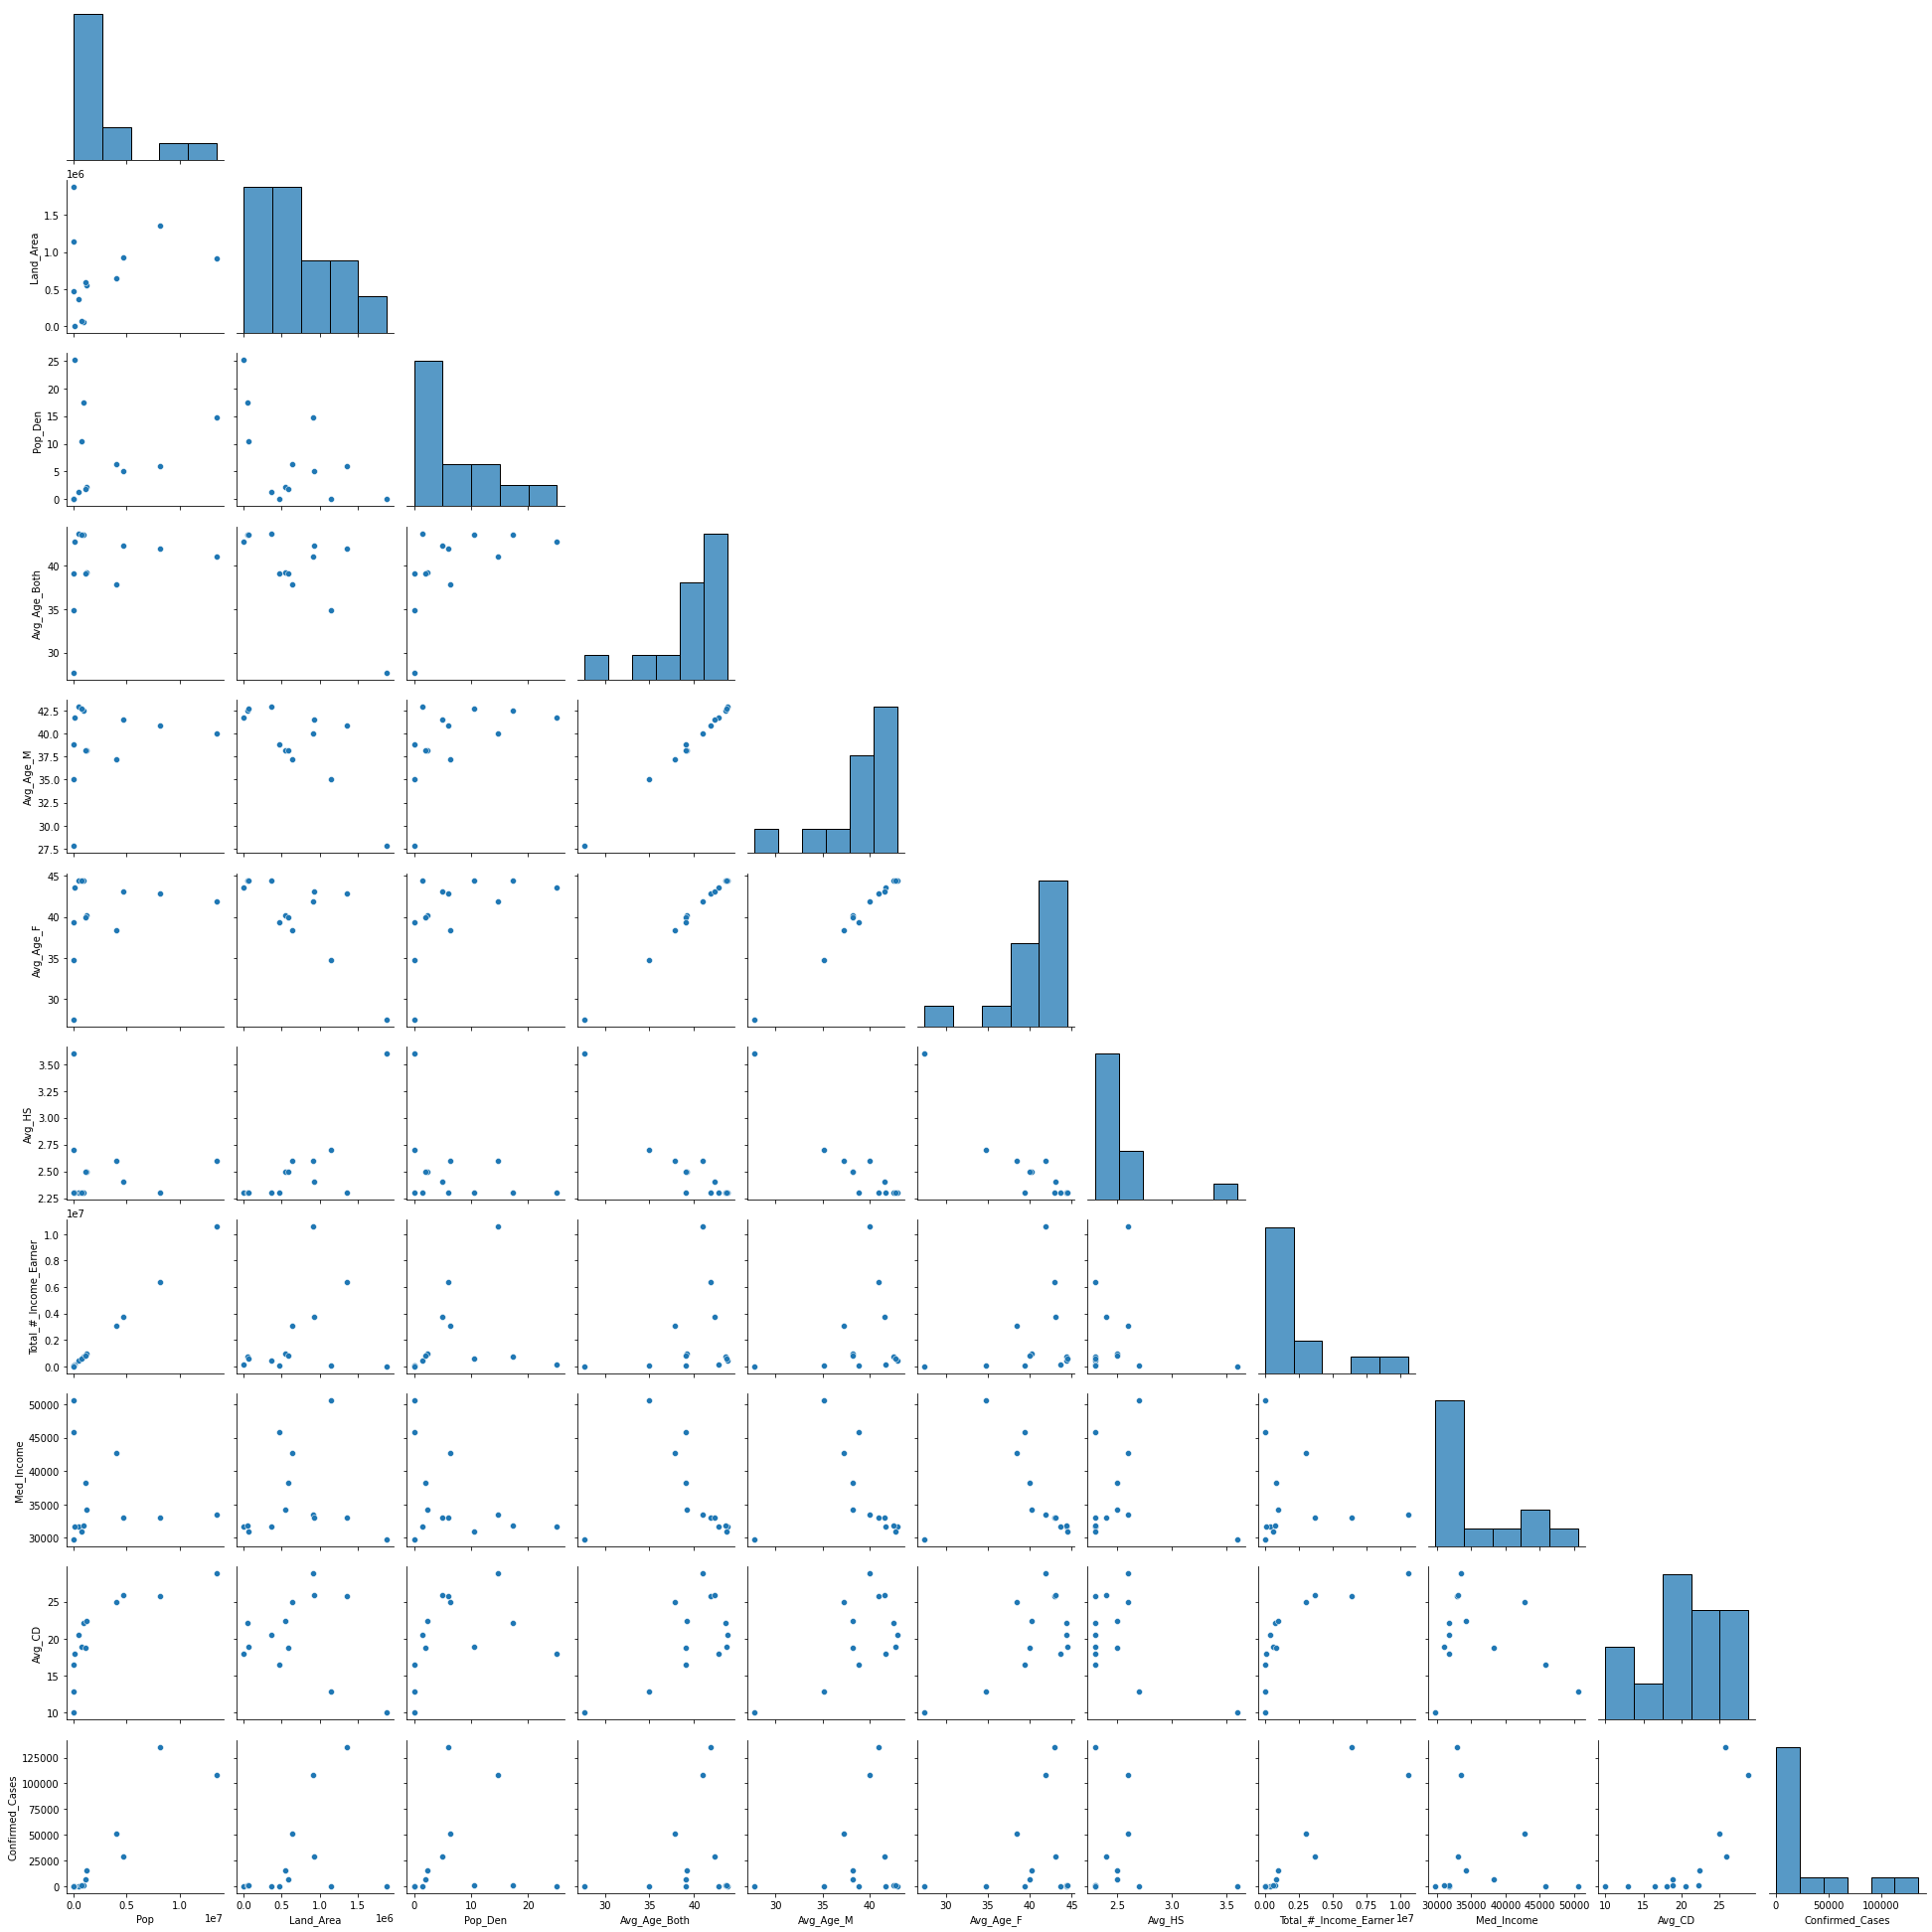

In [16]:
prov_pairplot = sns.pairplot(new_prov,corner=True)

In [21]:
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 225kB 5.5MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=5db186e4ad6181e85b0cb4cc9a06867ec79b84df43736a09b7c05045b8d74bb8
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=4e906024a3035bc984ffb9b3cbd3dd74a5365557a56702f38647c00502b39bf8
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7050 sha256=01fbf232a08abb29f8df32985df0aaf6d74ea0eacf6254b45cbcb41a5c2378b6
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


TypeError: ignored

In [83]:
new_prov.corr().round(3)

,Pop,Land_Area,Pop_Den,Avg_Age_Both,Avg_Age_M,Avg_Age_F,Avg_HS,Total_#_Income_Earner,Med_Income,Avg_CD,Confirmed_Cases
Pop,1.000,0.291,0.223,0.211,0.189,0.228,-0.076,1.000,-0.164,0.768,0.911
Land_Area,0.291,1.000,-0.535,-0.745,-0.748,-0.740,0.750,0.292,0.084,-0.202,0.386
Pop_Den,0.223,-0.535,1.000,0.514,0.497,0.520,-0.355,0.225,-0.422,0.329,0.124
Avg_Age_Both,0.211,-0.745,0.514,1.000,0.998,0.999,-0.931,0.216,-0.279,0.642,0.166
Avg_Age_M,0.189,-0.748,0.497,0.998,1.000,0.994,-0.939,0.194,-0.244,0.618,0.144
Avg_Age_F,0.228,-0.740,0.520,0.999,0.994,1.000,-0.925,0.232,-0.300,0.661,0.185
Avg_HS,-0.076,0.750,-0.355,-0.931,-0.939,-0.925,1.000,-0.079,-0.037,-0.526,-0.103
Total_#_Income_Earner,1.000,0.292,0.225,0.216,0.194,0.232,-0.079,1.000,-0.170,0.767,0.909
Med_Income,-0.164,0.084,-0.422,-0.279,-0.244,-0.300,-0.037,-0.170,1.000,-0.245,-0.119
Avg_CD,0.768,-0.202,0.329,0.642,0.618,0.661,-0.526,0.767,-0.245,1.000,0.698


In [89]:
new_prov.pcorr().round(3)

,Pop,Land_Area,Pop_Den,Avg_Age_Both,Avg_Age_M,Avg_Age_F,Avg_HS,Total_#_Income_Earner,Med_Income,Avg_CD,Confirmed_Cases
Pop,1.000,-0.846,-0.495,-0.882,-0.133,-0.114,0.013,1.000,0.025,0.580,0.807
Land_Area,-0.846,1.000,-0.721,-0.770,0.144,-0.385,0.290,0.847,-0.331,0.462,0.891
Pop_Den,-0.495,-0.721,1.000,-0.458,0.082,-0.224,0.168,0.499,-0.432,0.095,0.560
Avg_Age_Both,-0.882,-0.770,-0.458,1.000,-0.453,0.202,-0.307,0.884,0.156,0.448,0.681
Avg_Age_M,-0.133,0.144,0.082,-0.453,1.000,0.965,-0.988,0.138,0.671,-0.274,-0.180
Avg_Age_F,-0.114,-0.385,-0.224,0.202,0.965,1.000,0.994,0.109,-0.691,0.433,0.398
Avg_HS,0.013,0.290,0.168,-0.307,-0.988,0.994,1.000,-0.009,0.690,-0.369,-0.313
Total_#_Income_Earner,1.000,0.847,0.499,0.884,0.138,0.109,-0.009,1.000,-0.027,-0.572,-0.802
Med_Income,0.025,-0.331,-0.432,0.156,0.671,-0.691,0.690,-0.027,1.000,0.107,0.288
Avg_CD,0.580,0.462,0.095,0.448,-0.274,0.433,-0.369,-0.572,0.107,1.000,-0.483


**use r_corr**
The only issue with these functions, however, is that they do not return the p-values, but only the correlation coefficients. Here again, Pingouin has a very convenient function that will show a similar correlation matrix with the r-value on the lower triangle and p-value on the upper triangle

In [94]:
new_prov.rcorr(stars=False)

,Pop,Land_Area,Pop_Den,Avg_Age_Both,Avg_Age_M,Avg_Age_F,Avg_HS,Total_#_Income_Earner,Med_Income,Avg_CD,Confirmed_Cases
Pop,-,0.334,0.464,0.488,0.535,0.453,0.804,0.000,0.592,0.002,0.000
Land_Area,0.291,-,0.059,0.003,0.003,0.004,0.003,0.333,0.785,0.508,0.193
Pop_Den,0.223,-0.535,-,0.073,0.084,0.068,0.234,0.46,0.151,0.273,0.687
Avg_Age_Both,0.211,-0.745,0.514,-,0.000,0.000,0.000,0.479,0.356,0.018,0.588
Avg_Age_M,0.189,-0.748,0.497,0.998,-,0.000,0.000,0.525,0.422,0.024,0.639
Avg_Age_F,0.228,-0.74,0.52,0.999,0.994,-,0.000,0.445,0.320,0.014,0.546
Avg_HS,-0.076,0.75,-0.355,-0.931,-0.939,-0.925,-,0.798,0.904,0.065,0.739
Total_#_Income_Earner,1.0,0.292,0.225,0.216,0.194,0.232,-0.079,-,0.579,0.002,0.000
Med_Income,-0.164,0.084,-0.422,-0.279,-0.244,-0.3,-0.037,-0.17,-,0.420,0.698
Avg_CD,0.768,-0.202,0.329,0.642,0.618,0.661,-0.526,0.767,-0.245,-,0.008


In [29]:
new_prov

,Name,Pop,Land_Area,Pop_Den,Avg_Age_Both,Avg_Age_M,Avg_Age_F,Avg_HS,Total_#_Income_Earner,Med_Income,Avg_CD,Confirmed_Cases
0,Newfoundland and Labrador,519716,370514.08,1.4,43.7,42.9,44.4,2.3,422335,31754,20.5,324
1,Prince Edward Island,142907,5686.03,25.1,42.7,41.7,43.6,2.3,113480,31744,18.0,70
2,Nova Scotia,923598,52942.27,17.4,43.5,42.5,44.4,2.3,744260,31813,22.2,1243
3,New Brunswick,747101,71388.81,10.5,43.6,42.7,44.5,2.3,594710,30961,18.9,453
4,Quebec,8164361,1356625.27,6.0,41.9,40.9,42.9,2.3,6417615,32975,25.8,135430
5,Ontario,13448494,908699.33,14.8,41.0,40.0,41.9,2.6,10556935,33539,28.8,107883
6,Manitoba,1278365,552370.99,2.3,39.2,38.2,40.2,2.5,954040,34188,22.4,14907
7,Saskatchewan,1098352,588243.54,1.9,39.1,38.2,40.0,2.5,822620,38299,18.8,7047
8,Alberta,4067175,640330.46,6.4,37.8,37.2,38.4,2.6,3053470,42717,25.0,50801
9,British Columbia,4648055,922503.01,5.0,42.3,41.5,43.1,2.4,3727360,33012,25.9,29086


In [80]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

col_names = new_prov.columns
prov_name = new_prov['Name']
prov_name = pd.DataFrame(prov_name)
scaler = MinMaxScaler()
X = new_prov.drop(columns=['Name'])
new_prov_s = scaler.fit_transform(X.values)
dataframe = pd.DataFrame.from_records(new_prov_s)
test = pd.concat([prov_name, dataframe], axis=1)
test.columns = col_names

X = test.drop(columns=['Name', 'Confirmed_Cases'])
y = test['Confirmed_Cases']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(test)
print(est2.summary())

                         Name       Pop  ...    Avg_CD  Confirmed_Cases
0   Newfoundland and Labrador  0.036074  ...  0.558511         0.002282
1        Prince Edward Island  0.007980  ...  0.425532         0.000406
2                 Nova Scotia  0.066186  ...  0.648936         0.009068
3               New Brunswick  0.053027  ...  0.473404         0.003235
4                      Quebec  0.606033  ...  0.840426         1.000000
5                     Ontario  1.000000  ...  1.000000         0.796573
6                    Manitoba  0.092636  ...  0.659574         0.109973
7                Saskatchewan  0.079215  ...  0.468085         0.051929
8                     Alberta  0.300560  ...  0.797872         0.375040
9            British Columbia  0.343869  ...  0.845745         0.214681
10                      Yukon  0.000000  ...  0.345745         0.000177
11      Northwest Territories  0.000441  ...  0.154255         0.000000
12                    Nunavut  0.000005  ...  0.000000         0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [82]:
non_s_X = new_prov.drop(columns=['Name', 'Confirmed_Cases'])
non_s_y = new_prov['Confirmed_Cases']

non_s_XX2 = sm.add_constant(non_s_X)
non_s_Xest = sm.OLS(non_s_y, non_s_X)
non_s_Xest2 = non_s_Xest.fit()
print(non_s_Xest2.summary())

                                 OLS Regression Results                                
Dep. Variable:        Confirmed_Cases   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              29.21
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                     0.00903
Time:                        21:58:42   Log-Likelihood:                         -129.51
No. Observations:                  13   AIC:                                      279.0
Df Residuals:                       3   BIC:                                      284.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
